<h1>Ejercicios Prácticos</h1>
<h1>Task 2.1 - Gradiente Descendiente Estocástico</h1>
<p>Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos solicitados y la distribución real de puntos. Para esto considere que:
El polinomio que debe usar es 2 * x**3 - 3 * x**2 + 5 * x + 3
Considere el uso de np.polyval
Considere el uso de np.polyder
Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método fue más rápido y por qué.
Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De esto mencione cuál método lo hizo mejor y por qué
 </p>




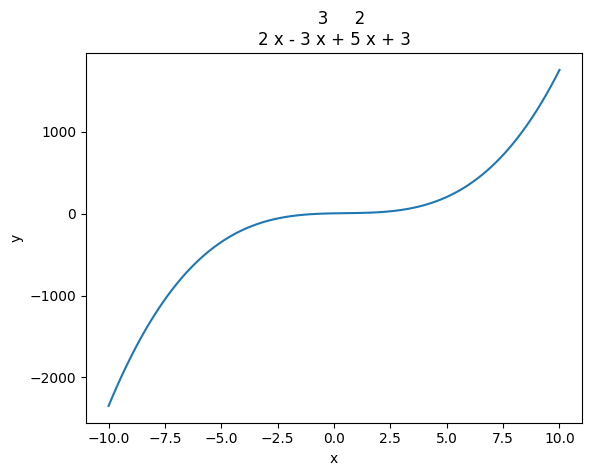

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar el arreglo con los coeficientes del polinomio
coefficients = [2, -3, 5, 3]
# crear el objeto del polinomio
polynomial = np.poly1d(coefficients, variable = 'x')
# hacer el eje x y graficar los puntos del eje y
x = np.linspace(-10, 10, 100)
y = polynomial(x)
# poner las leyendas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'{polynomial}')
# graficar el polinomio
plt.plot(x, y, label=str(polynomial))

Iteration 1, Loss: 0.0
Iteration 2, Loss: 0.0
Iteration 3, Loss: 0.0
Iteration 4, Loss: 0.0
Iteration 5, Loss: 0.0
Iteration 6, Loss: 0.0
Iteration 7, Loss: 0.0
Iteration 8, Loss: 0.0
Iteration 9, Loss: 0.0
Iteration 10, Loss: 0.0
Iteration 11, Loss: 0.0
Iteration 12, Loss: 0.0
Iteration 13, Loss: 0.0
Iteration 14, Loss: 0.0
Iteration 15, Loss: 0.0
Iteration 16, Loss: 0.0
Iteration 17, Loss: 0.0
Iteration 18, Loss: 0.0
Iteration 19, Loss: 0.0
Iteration 20, Loss: 0.0
Iteration 21, Loss: 0.0
Iteration 22, Loss: 0.0
Iteration 23, Loss: 0.0
Iteration 24, Loss: 0.0
Iteration 25, Loss: 0.0
Iteration 26, Loss: 0.0
Iteration 27, Loss: 0.0
Iteration 28, Loss: 0.0
Iteration 29, Loss: 0.0
Iteration 30, Loss: 0.0
Iteration 31, Loss: 0.0
Iteration 32, Loss: 0.0
Iteration 33, Loss: 0.0
Iteration 34, Loss: 0.0
Iteration 35, Loss: 0.0
Iteration 36, Loss: 0.0
Iteration 37, Loss: 0.0
Iteration 38, Loss: 0.0
Iteration 39, Loss: 0.0
Iteration 40, Loss: 0.0
Iteration 41, Loss: 0.0
Iteration 42, Loss: 0.0
I

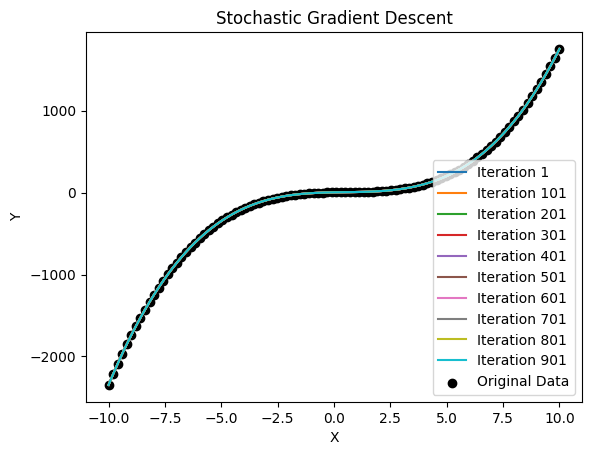

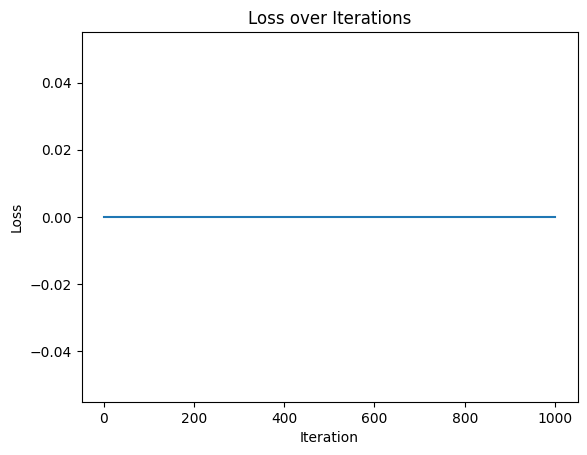

Result: [ 3.  5. -3.  2.]


In [3]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Gradiente descendiente

# Configurar el arreglo con los coeficientes del polinomio
coefficients = [2, -3, 5, 3]
# Crear el objeto del polinomio
polynomial = np.poly1d(coefficients, variable='x')

# Parámetro de inicialización
i = rand.uniform(-10, 10)
# Obtener los pesos (coeficientes del polinomio)
w = coefficients[::-1]

# Calcular la derivada del polinomio
der = np.polyder(polynomial)

# eta (learning rate)
eta = 0.01

def prediction(i, w):
    # Predecir el resultado para y sumando los pesos del polinomio
    return sum(w[j] * (i ** j) for j in range(len(w)))

def lossFunct(predicted_out, real_out):
    # Para usar el MSE (nuestra función de pérdida)
    return ((predicted_out - real_out) ** 2) / 2

def calcGradient(i, w, predicted_out, real_out):
    gradient = np.array([i ** j for j in range(len(w))]) * (predicted_out - real_out)
    return gradient

def stochasticGradientDescent(i, w, eta, polynomial, epochs=1000):
    # para guardar los datos
    iterations = []
    losses = []

    for iter in range(epochs):
        real_out = polynomial(i)  # evaluar el valor real del polinomio
        predicted_out = prediction(i, w)
        loss = lossFunct(predicted_out, real_out)
        gradient = calcGradient(i, w, predicted_out, real_out)

        # Actualizar los pesos, el gradiente y el learning rate
        w = w - eta * gradient

        # Almacenar resultados para graficar
        iterations.append(iter + 1)
        losses.append(loss)

        # Imprimir la pérdida por cada iteración
        print(f'Iteration {iter + 1}, Loss: {loss}')

        if iter % 100 == 0:
            # Plot the current polynomial approximation
            x_values = np.linspace(-10, 10, 100)
            y_values = np.polyval(w[::-1], x_values)
            plt.plot(x_values, y_values, label=f'Iteration {iter + 1}')

    # GRaficar los puntos originales
    x_data = np.linspace(-10, 10, 100)
    y_data = polynomial(x_data)
    plt.scatter(x_data, y_data, color='black', label='Original Data')

    # Labels
    plt.title('Stochastic Gradient Descent')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

    # Graficar la perdida a traves de las operaciones
    plt.plot(iterations, losses)
    plt.title('Loss over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

    return w

result = stochasticGradientDescent(i, w, eta, polynomial)
print("Result: " + str(result))


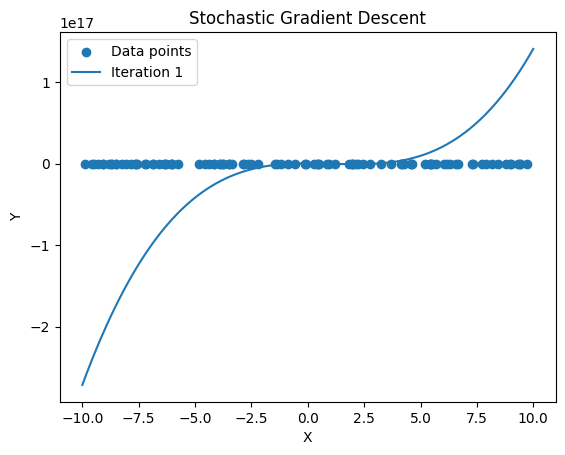

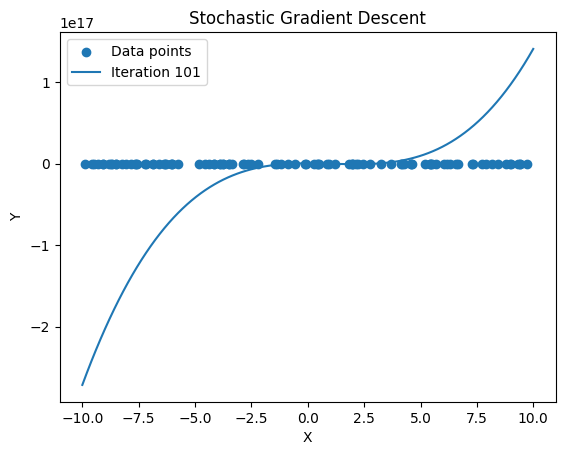

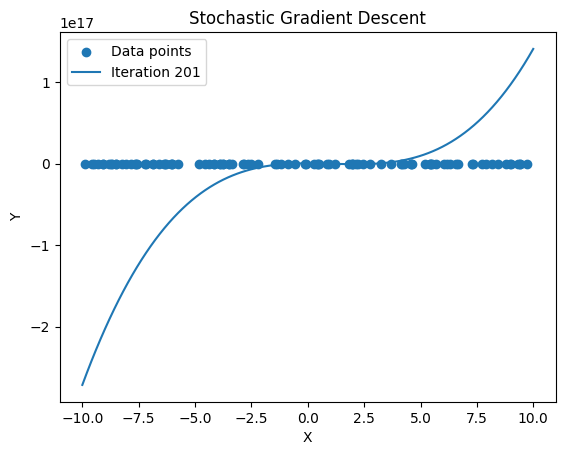

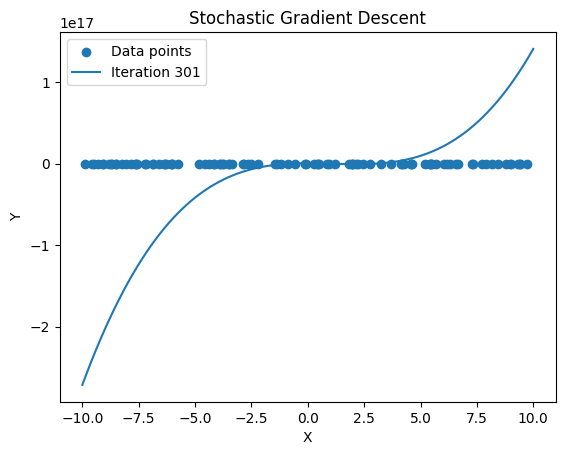

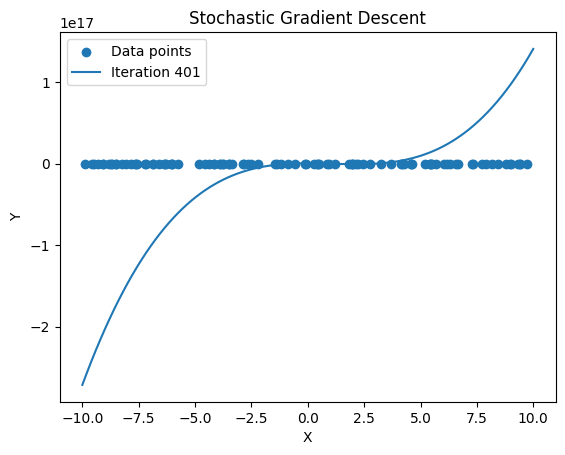

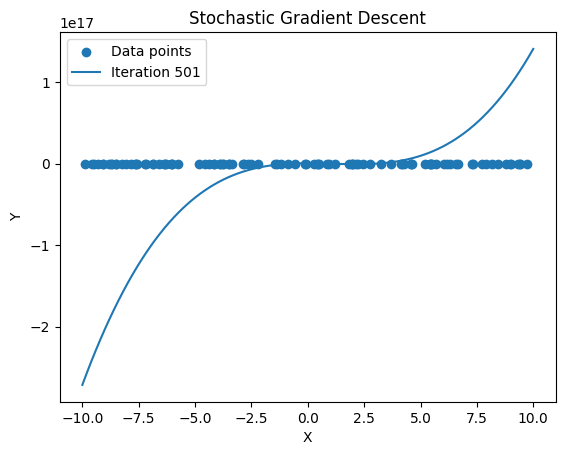

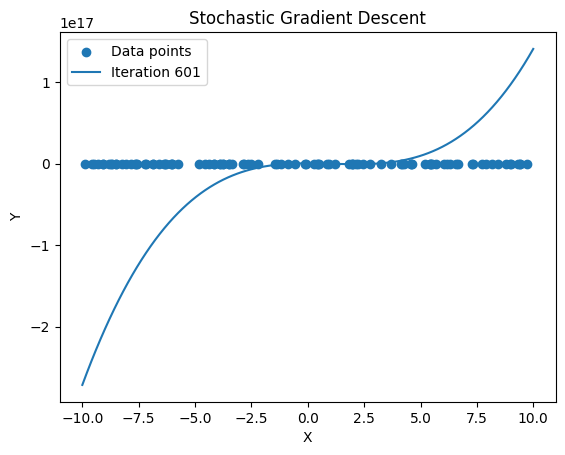

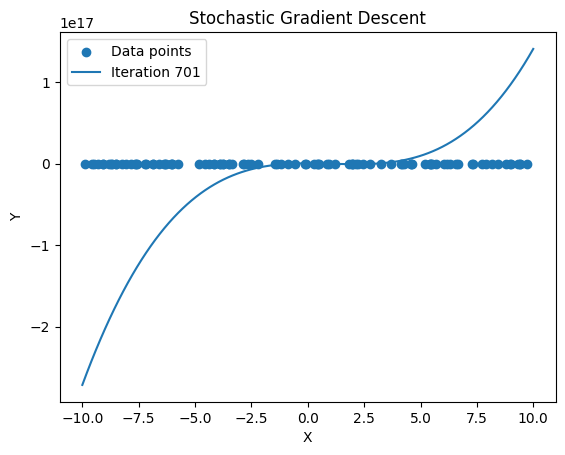

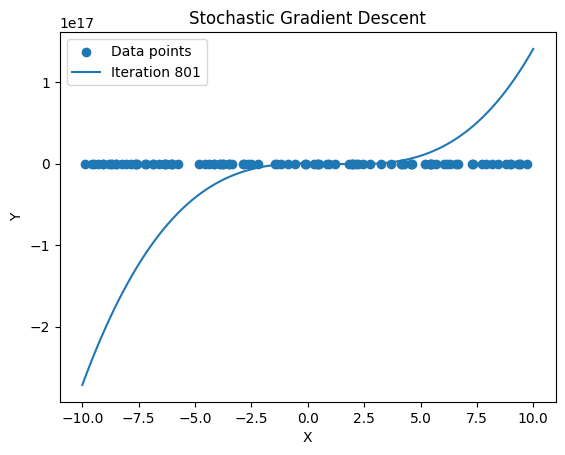

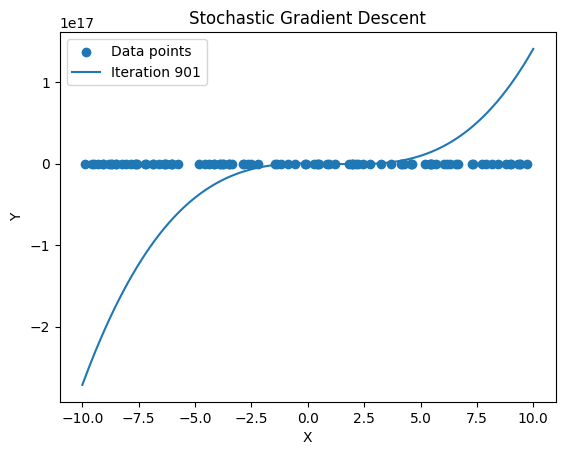

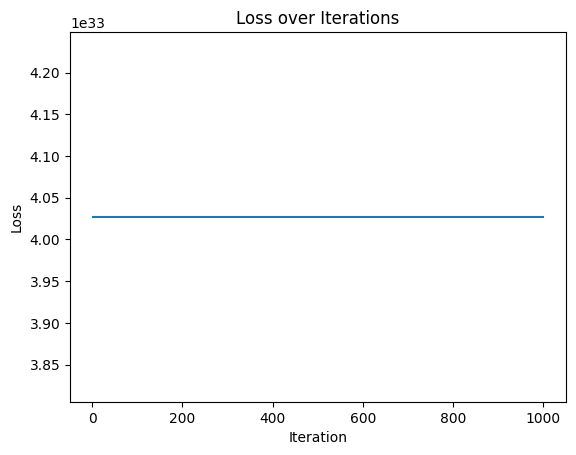

In [23]:
#Usando Scikitlearn
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

coefficients = [2, -3, -5, 3]

np.random.seed(42)

X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
y = np.polyval(coefficients[::-1], X.squeeze()) + np.random.normal(0, 5, 100)

# Crear un SDGRegressor con un polinomio de transformacion de features
degree = len(coefficients) - 1
model = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=1000, learning_rate='optimal', random_state=42))

# Entrenar el modelo
iterations = []
losses = []

# Stochastic Gradient Descent
for iteration in range(1000):
    model.fit(X, y)
    predicted_values = model.predict(X)
    loss = np.mean((predicted_values - y) ** 2) / 2

    # Store results for plotting
    iterations.append(iteration + 1)
    losses.append(loss)

    if iteration % 100 == 0:
        # Graficar los puntos 
        plt.scatter(X, y, label='Puntos')
        x_values = np.linspace(-10, 10, 100).reshape(-1, 1)
        y_values = model.predict(x_values)
        plt.plot(x_values, y_values, label=f'Iteración {iteration + 1}')
        plt.title('Stochastic Gradient Descent')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

# Graficar la pérdida sobre las iteraciones
plt.plot(iterations, losses)
plt.title('Pérdida sobre las iteraciones')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()


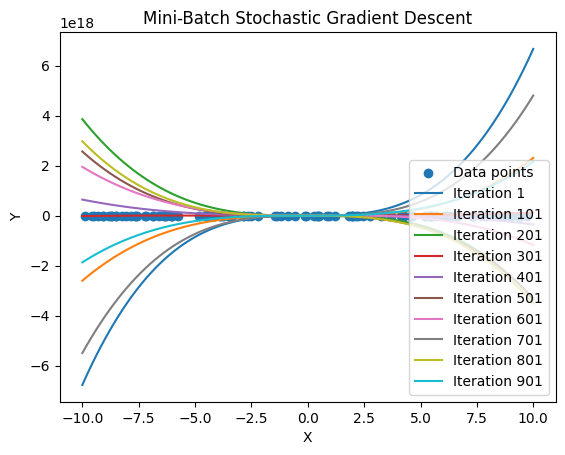

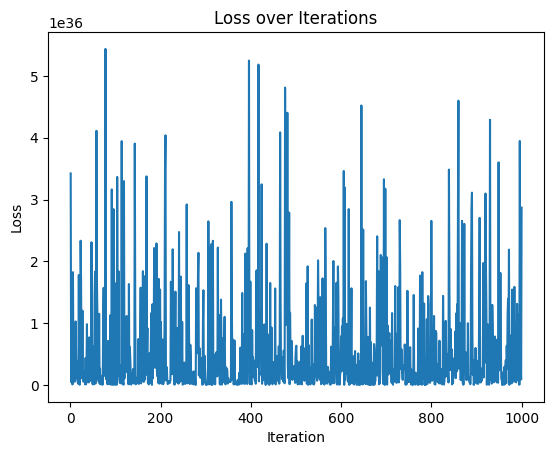

In [2]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Define the polynomial coefficients
coefficients = [2, -3, 5, 3]

# Create synthetic data for training
np.random.seed(42)
X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
y = np.polyval(coefficients[::-1], X.squeeze()) + np.random.normal(0, 5, 100)

# Create an SGDRegressor with a polynomial feature transformation
degree = len(coefficients) - 1
model = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=1000, learning_rate='optimal', random_state=42))

# Parameters for mini-batch SGD
batch_size = 10
num_batches = len(X) // batch_size

# Arrays to store results for plotting
iterations = []
losses = []

# Plot the original data points
plt.scatter(X, y, label='Data points')

# Perform Mini-Batch Stochastic Gradient Descent
for iteration in range(1000):
    # Shuffle the data for each iteration
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = X_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]

        model.fit(X_batch, y_batch)

    # Calculate loss using the entire dataset
    predicted_values = model.predict(X)
    loss = np.mean((predicted_values - y) ** 2) / 2

    # Store results for plotting
    iterations.append(iteration + 1)
    losses.append(loss)

    if iteration % 100 == 0:
        # Update the plot with the current polynomial
        x_values = np.linspace(-10, 10, 100).reshape(-1, 1)
        y_values = model.predict(x_values)
        plt.plot(x_values, y_values, label=f'Iteration {iteration + 1}')

# Add labels and legend
plt.title('Mini-Batch Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.plot(iterations, losses)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

